# Exploring the MNIST Digits Dataset

## Importing Data

In [3]:
!pip list
!pip install keras==2.9

Package                      Version
---------------------------- -----------
absl-py                      0.11.0
adal                         1.2.7
anyio                        3.6.2
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
asttokens                    2.2.1
astunparse                   1.6.3
attrs                        22.2.0
avro                         1.11.1
azure-common                 1.1.28
azure-storage-blob           2.1.0
azure-storage-common         2.1.0
Babel                        2.11.0
backcall                     0.2.0
beautifulsoup4               4.11.1
bleach                       6.0.0
bokeh                        2.3.2
brotlipy                     0.7.0
cachetools                   4.2.4
certifi                      2022.12.7
cffi                         1.14.6
charset-normalizer           2.1.1
click                        7.1.2
cloudevents                  1.9.0
cloudpickle                  1.6.0
colorama                     0.4.6

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from tensorflow import keras
import keras
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


## Exploring Data

In [6]:
# check shape of the data

print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")

print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


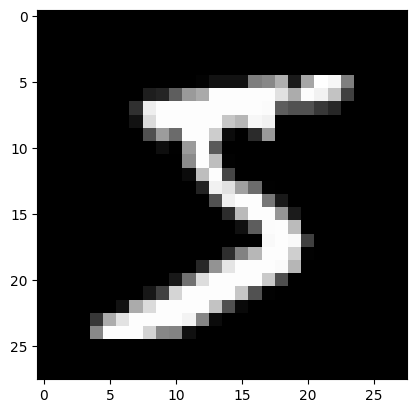

correct number: 5


In [7]:
# visualize single data instances

img_no = 0 #change the number to display other examples

first_number = x_train[img_no]
plt.imshow(first_number, cmap='gray') # visualize the numbers in gray mode
plt.show()
print(f"correct number: {y_train[img_no]}")

## Preparing Data & Splitting

In [8]:
# reshaping the data
# reshaping pixels in a 28x28px image with greyscale, canal = 1. This is needed for the Keras API
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

# normalizing the data
# each pixel has a value between 0-255. Here we divide by 255, to get values from 0-1
x_train = x_train / 255
x_test = x_test / 255

print(f"train X shape: {x_train.shape}")
print(f"test X shape: {x_test.shape}")

train X shape: (60000, 28, 28, 1)
test X shape: (10000, 28, 28, 1)


In [9]:
# new functions

## Model Building

In [10]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2, 2))

model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPool2D(2, 2))

model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPool2D(2, 2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))

model.add(keras.layers.Dense(32, activation='relu'))

model.add(keras.layers.Dense(10, activation='softmax')) #output are 10 classes, numbers from 0-9

#show model summary - how it looks
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

2023-07-23 09:08:28.958204: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-07-23 09:08:28.958344: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-07-23 09:08:28.958407: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (digits-reg-0): /proc/driver/nvidia/version does not exist
2023-07-23 09:08:28.960483: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
#compile the model - we want to have a multiple outcome
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [12]:
#fit the model and return the history while training
history = model.fit(
  x=x_train,
  y=y_train,
  epochs=1
)

2023-07-23 09:08:43.546061: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


   2/1875 [..............................] - ETA: 3:04 - loss: 2.3073 - accuracy: 0.1094 

2023-07-23 09:08:45.161099: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 19236096 exceeds 10% of free system memory.
2023-07-23 09:08:45.161199: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 19236096 exceeds 10% of free system memory.
2023-07-23 09:08:45.268913: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 19236096 exceeds 10% of free system memory.
2023-07-23 09:08:45.269096: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 19236096 exceeds 10% of free system memory.


1875/1875 [==============================] - 142s 75ms/step - loss: 0.2311 - accuracy: 0.9281


## Model Evaluation

In [13]:
keras.models.save_model(model,"models/detect-digits")

INFO:tensorflow:Assets written to: models/detect-digits/assets


INFO:tensorflow:Assets written to: models/detect-digits/assets


In [16]:
from minio import Minio
import os

minio_client = Minio(
        # "100.65.11.110:9000",
        "10.111.104.152:9000",
        access_key="minio",
        secret_key="minio123",
        secure=False
    )
minio_bucket = "mlpipeline"


import glob

def upload_local_directory_to_minio(local_path, bucket_name, minio_path):
    assert os.path.isdir(local_path)

    for local_file in glob.glob(local_path + '/**'):
        local_file = local_file.replace(os.sep, "/") # Replace \ with / on Windows
        if not os.path.isfile(local_file):
            upload_local_directory_to_minio(
                local_file, bucket_name, minio_path + "/" + os.path.basename(local_file))
        else:
            remote_path = os.path.join(
                minio_path, local_file[1 + len(local_path):])
            remote_path = remote_path.replace(
                os.sep, "/")  # Replace \ with / on Windows
            minio_client.fput_object(bucket_name, remote_path, local_file)
            
upload_local_directory_to_minio("models/detect-digits",minio_bucket,"models/detect-digits")

In [18]:
#load model if already trained
model = keras.models.load_model("models/detect-digits")
#keras.models.save_model(model,"detect-digits.h5")

In [19]:
# Test the model against the test dataset
# Returns the loss value & metrics values for the model in test mode.
model_loss, model_accuracy = model.evaluate(x=x_test,y=y_test)

313/313 [==============================] - 6s 19ms/step - loss: 0.0955 - accuracy: 0.9711


313/313 [==============================] - 6s 17ms/step


[Text(0.5, 23.52222222222222, 'Predicted'),
 Text(50.722222222222214, 0.5, 'Actual')]

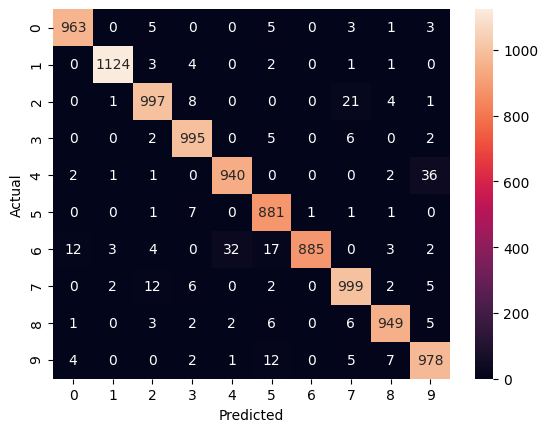

In [20]:
# Confusion Matrix

# Generates output predictions for the input samples.
test_predictions = model.predict(x=x_test)

# Returns the indices of the maximum values along an axis.
test_predictions = np.argmax(test_predictions,axis=1) # the prediction outputs 10 values, we take the index number of the highest value, which is the prediction of the model

# generate confusion matrix
confusion_matrix = tf.math.confusion_matrix(labels=y_test,predictions=test_predictions)

# plot confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
h = sns.heatmap(confusion_matrix,annot=True,fmt='d')
h.set(xlabel='Predicted', ylabel='Actual')